In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import matplotlib.cm as cm
from scipy.misc import imresize
import cv2
import pandas as pd
import scipy.io as io

C:\Anaconda-python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
txt = pd.read_csv('C:/MPIIGaze/MPIIGaze/Data/Original/p00/day01/annotation.txt',
                  sep = ' ' ,header= None)

In [3]:
df_anno = pd.DataFrame(txt)

In [4]:
import seaborn as sns

In [5]:
data_frame = pd.DataFrame()

In [6]:
data_frame['Screen_x'] = df_anno[:][24]
data_frame['Screen_y'] = df_anno[:][25]

In [7]:
data_frame.head()

,Screen_x,Screen_y
0,854,270
1,806,630
2,948,467
3,389,166
4,476,758


In [8]:
cal_data = io.loadmat('C:/MPIIGaze/MPIIGaze/Data/Original/p00/Calibration/screenSize.mat')

In [9]:
cal_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'height_mm', 'height_pixel', 'width_mm', 'width_pixel'])

In [10]:
cal_data['height_mm'][0][0]

179.0442

In [11]:
screen_datas = np.zeros((995, 4))

In [12]:
screen_datas.shape
#col 0 -> Screen width
#col 1 -> Screen height
#col 2 -> Pixel width
#col 3 -> Pixel height

(995, 4)

In [13]:
for i in range(len(data_frame['Screen_x'])):
    screen_datas[i][0] = cal_data['width_mm'][0][0]  
    screen_datas[i][1] = cal_data['height_mm'][0][0]
    screen_datas[i][2] = cal_data['width_pixel'][0][0]
    screen_datas[i][3] = cal_data['height_pixel'][0][0]

In [14]:
screen_datas_df = pd.DataFrame(screen_datas)

In [16]:
data_frame['Screen_width'] = screen_datas_df[0]
data_frame['Screen_height'] = screen_datas_df[1]
data_frame['Pixel width'] = screen_datas_df[2]
data_frame['Pixel height'] = screen_datas_df[3]

In [17]:
data_frame

,Screen_x,Screen_y,Screen_width,Screen_height,Pixel width,Pixel height
0,854,270,286.4708,179.0442,1280.0,800.0
1,806,630,286.4708,179.0442,1280.0,800.0
2,948,467,286.4708,179.0442,1280.0,800.0
3,389,166,286.4708,179.0442,1280.0,800.0
4,476,758,286.4708,179.0442,1280.0,800.0
5,1005,575,286.4708,179.0442,1280.0,800.0
6,1140,17,286.4708,179.0442,1280.0,800.0
7,94,465,286.4708,179.0442,1280.0,800.0
8,664,292,286.4708,179.0442,1280.0,800.0
9,1129,51,286.4708,179.0442,1280.0,800.0


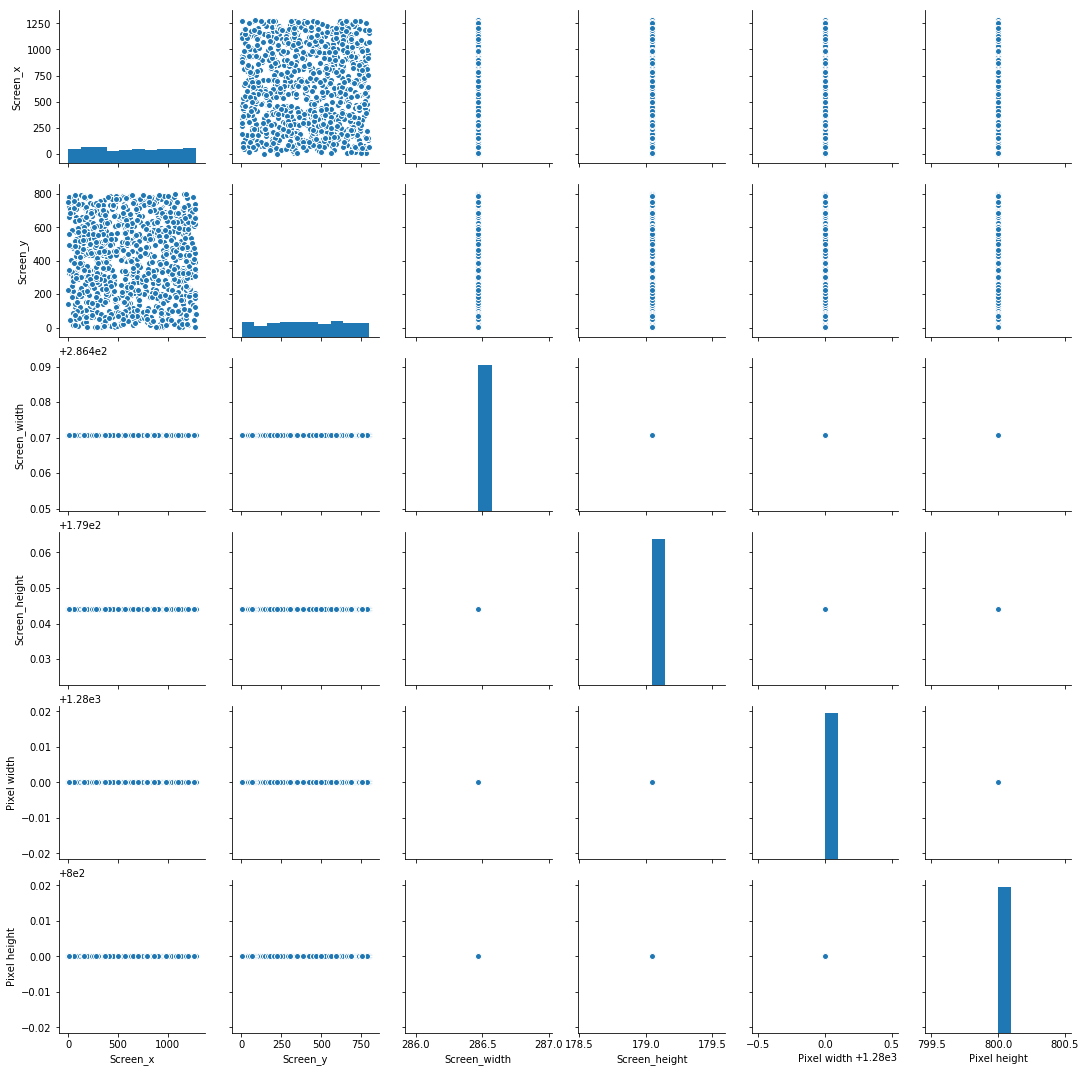